<a href="https://colab.research.google.com/github/thisaraniNJ/MachineLearning_CW/blob/main/MachineLearningCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install --upgrade imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


**Load the Dataset**


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML CW/bank-additional-full.csv', delimiter=";")

In [4]:
# Display the initial dataset structure
print("Dataset Overview: ")
print(df.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

In [5]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.co

**Encode Categorical Variables**

In [6]:
# Encode the target variable ('y') to binary (yes: 1, no: 0)
df['y'] = df['y'].map({
    'yes': 1,
    'no':0
})

In [7]:
# Identify categorical columns
categorical_columns =[
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "day_of_week", "poutcome"
]

In [8]:
# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

**Handle Missing Values**

In [9]:
# Check for missing values
print("\nMissing values in the dataset: ")
print(df.isnull().sum())


Missing values in the dataset: 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Feature Scaling**

In [10]:
# Identify numerical columns
numerical_columns = [
    "age", "duration", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

In [11]:
# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Handle Class Imbalance**

In [12]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [13]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Test - Train Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

In [15]:
# Display summary of the prepared dataset
print("\nTraining Dataset (X_train) Shape:", X_train.shape)
print("Test Dataset (X_test) Shape:", X_test.shape)
print("Training Target (y_train) Distribution:")
print(y_train.value_counts())
print("\nTest Target (y_test) Distribution:")
print(y_test.value_counts())


Training Dataset (X_train) Shape: (51167, 20)
Test Dataset (X_test) Shape: (21929, 20)
Training Target (y_train) Distribution:
y
1    25584
0    25583
Name: count, dtype: int64

Test Target (y_test) Distribution:
y
0    10965
1    10964
Name: count, dtype: int64


# Neural Network Model

Import necessary libraries

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Define the Neural Network Model

In [17]:
# Define the Neural Network Model
def build_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Define the input shape explicitly
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [18]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
nn_model = build_nn_model(input_dim)

In [19]:
# Display model summary
print("\nNeural Network Model Summary:")
nn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Train the Neural Network Model

In [63]:
batch_size = 8
epochs = 50

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9201 - loss: 0.2091 - val_accuracy: 0.9156 - val_loss: 0.2197
Epoch 2/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9185 - loss: 0.2123 - val_accuracy: 0.9154 - val_loss: 0.2190
Epoch 3/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9192 - loss: 0.2105 - val_accuracy: 0.9139 - val_loss: 0.2213
Epoch 4/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9195 - loss: 0.2097 - val_accuracy: 0.9131 - val_loss: 0.2238
Epoch 5/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9195 - loss: 0.2087 - val_accuracy: 0.9144 - val_loss: 0.2217
Epoch 6/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9198 - loss: 0.2045 - val_accuracy: 0.9131 - val_loss: 0.2215
Epoch 7/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9180 - loss: 0.2128 - val_accuracy: 0.9137 - val_loss: 0.2234
Epoch 8/50
6396/6396 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9166 - loss: 0.21

Evaluate the Neural Network Model

In [64]:
print("\nEvaluating the Neural Network Model on Test Data:")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the Neural Network Model on Test Data:
Test Loss: 0.2244
Test Accuracy: 0.9171


Generate Preditions and Metrics

In [43]:
y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred))

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     10965
           1       0.88      0.96      0.92     10964

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



Visualize Training History

# Random Forest Classification

Import necessary libraries

In [65]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Define and Train the Random Forest Model

In [50]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=5000,  # Number of trees
    max_depth=None,    # No limit on depth of the trees
    random_state=42    # Ensure reproducibility
)

In [66]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

Evaluate the Random Forest Model

In [52]:
print("\nEvaluating the Random Forest Model on Test Data:")
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Generate Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Evaluating the Random Forest Model on Test Data:
Random Forest Test Accuracy: 0.9478

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10965
           1       0.92      0.97      0.95     10964

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



# Comparison of Neural Network and Random Forest Models

Import necessary libraries

In [53]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Generate Metrics for Comparison

In [54]:
# Neural Network Predictions
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_roc_auc = roc_auc_score(y_test, y_pred_nn)

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step


In [55]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

In [56]:
# Display key metrics
print("\nModel Performance Comparison:")
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}, ROC-AUC: {nn_roc_auc:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}, ROC-AUC: {rf_roc_auc:.4f}")



Model Performance Comparison:
Neural Network Test Accuracy: 0.9167, ROC-AUC: 0.9167
Random Forest Test Accuracy: 0.9478, ROC-AUC: 0.9478


Confusion Matrix


Confusion Matrices:


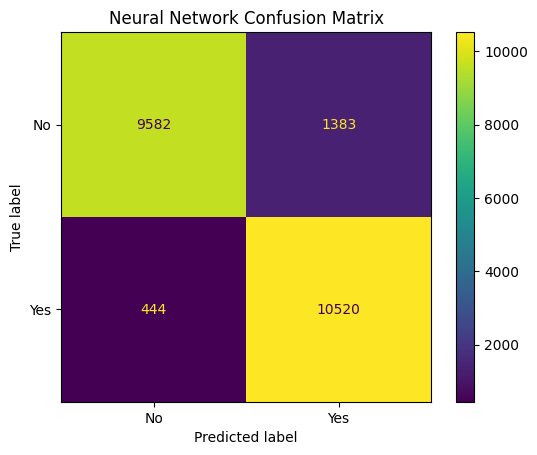

In [57]:
print("\nConfusion Matrices:")
# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=['No', 'Yes']).plot()
plt.title("Neural Network Confusion Matrix")
plt.show()

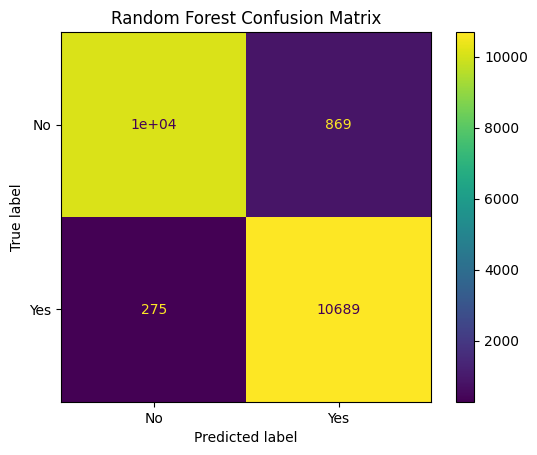

In [58]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['No', 'Yes']).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

Feature Importance Visualization (for Random Forest)

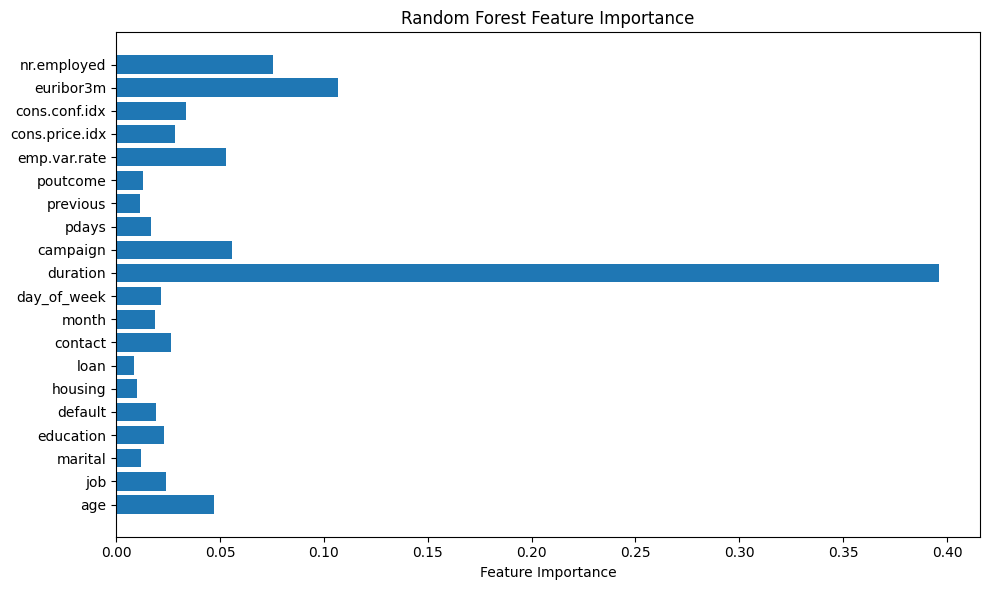

In [59]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Visualize Neural Network Training History

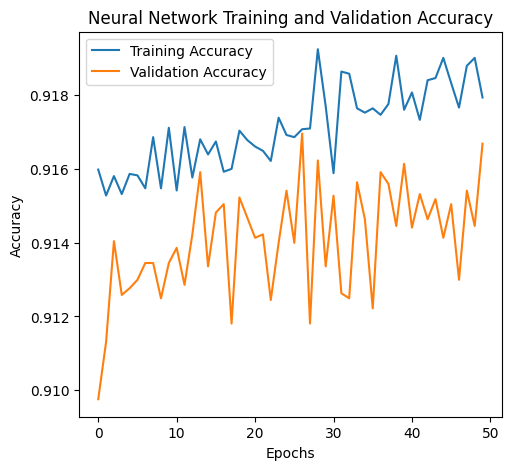

In [60]:
# Training vs Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.legend()

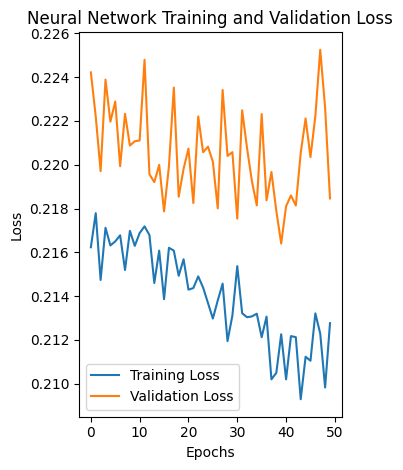

In [61]:
# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Observations

In [62]:
# Print observations based on metrics
print("\nObservations:")
if nn_accuracy > rf_accuracy:
    print("The Neural Network outperformed the Random Forest in terms of accuracy.")
else:
    print("The Random Forest outperformed the Neural Network in terms of accuracy.")

if nn_roc_auc > rf_roc_auc:
    print("The Neural Network had a higher ROC-AUC, indicating better performance on imbalanced data.")
else:
    print("The Random Forest had a higher ROC-AUC, indicating better handling of imbalanced data.")




Observations:
The Random Forest outperformed the Neural Network in terms of accuracy.
The Random Forest had a higher ROC-AUC, indicating better handling of imbalanced data.
